In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%run ../../scripts/model_prediction_analyses.py

In [2]:
#Load the metadata for the reference `V7 combined` composite dataset 
# (GSE42861, GSE125105, GSE72774, GSE106648) and separate it by healthy and disease cohorts

v7_meta = pd.read_excel('../../data/processed/metadata/V7_pmeta.xlsx')
h_meta = v7_meta.copy()
d_meta = v7_meta.copy()
h_meta = h_meta[h_meta.disease==0]
d_meta = d_meta[d_meta.disease==1]
h_meta.reset_index(drop=True, inplace=True)
d_meta.reset_index(drop=True, inplace=True)

In [19]:
h_model_stats=[]
d_model_stats=[]

In [14]:
# Read in and prepare the AdaptAge model 
adapt = pd.read_csv('../../data/processed/models/AdaptAge/AdaptAge.csv')
adapt=prep_dataset(adapt)

h_adapt = pd.read_pickle('../../data/processed/models/AdaptAge/Healthy.pkl')
d_adapt = pd.read_pickle('../../data/processed/models/AdaptAge/Disease.pkl')

In [16]:
h_meta.loc[:, 'AdaptAge'] = get_preds(h_adapt, adapt)
d_meta.loc[:, 'AdaptAge'] = get_preds(d_adapt, adapt)

In [ ]:
def model_residual_stats(h_meta, d_meta, model, h_data, d_data, model_name):
    
    h_meta.loc[:, model_name] = get_preds(h_data, model)
    d_meta.loc[:, model_name] = get_preds(d_data, model)
    
    # Get residuals for healthy cohort from the `V7 combined` composite dataset 
    # (GSE42861, GSE125105, GSE72774, GSE106648) for the model.
    h_resids=h_meta[model_name]-h_meta.age
    
    # Get residuals for patient cohort from the `V7 combined` composite dataset 
    d_resids=d_meta[model_name]-d_meta.age
    
    # Fit Normal distribution parameters
    params_norm = stats.norm.fit(h_resids)
    mu, std = params_norm
    
    alpha = 0.05  # Significance level (two-tailed)

    cutoff_lower = round(stats.norm.ppf(alpha / 2, loc=mu, scale=std),1)
    cutoff_upper = round(stats.norm.ppf(1 - alpha / 2, loc=mu, scale=std),1)
    mean = round(residuals.mean(),1)
    
    return 

In [ ]:
# Create PDFs (probability density functions) of the fitted distributions
xmin, xmax = plt.xlim()
adapt_x = np.linspace(xmin, xmax, 1000)
adapt_resids = stats.norm.pdf(adapt_x, mu, std)

adapt_fit = pd.DataFrame({'Error': adapt_x, 'Density': adapt_resids, 'Model': 'AdaptAge'})

p<0.05 Thresholds for fitted Normal distribution: 
Mean error: -2.82 years
Lower: -33.40 years
Upper: 27.70 years


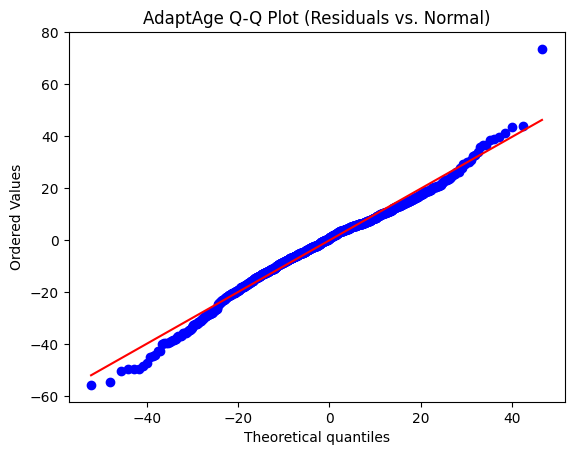

In [20]:
# Get residuals for healthy cohort from the `V7 combined` composite dataset 
# (GSE42861, GSE125105, GSE72774, GSE106648) for the AdaptAge model.
residuals=h_meta.AdaptAge-h_meta.age

# Fit Normal distribution parameters
params_norm = stats.norm.fit(residuals)
mu, std = params_norm


stats.probplot(residuals, dist="norm", sparams=params_norm, plot=plt)
plt.title('AdaptAge Q-Q Plot (Residuals vs. Normal)')

alpha = 0.05  # Significance level (two-tailed)

cutoff_lower = round(stats.norm.ppf(alpha / 2, loc=mu, scale=std),1)
cutoff_upper = round(stats.norm.ppf(1 - alpha / 2, loc=mu, scale=std),1)
mean = round(residuals.mean(),1)


h_model_stats+=[('AdaptAge',cutoff_lower, cutoff_upper, mean)]
print('p<0.05 Thresholds for fitted Normal distribution: ')
print('Mean error: {:.2f} years' .format(residuals.mean()))
print('Lower: {:.2f} years' .format(cutoff_lower))
print('Upper: {:.2f} years' .format(cutoff_upper))

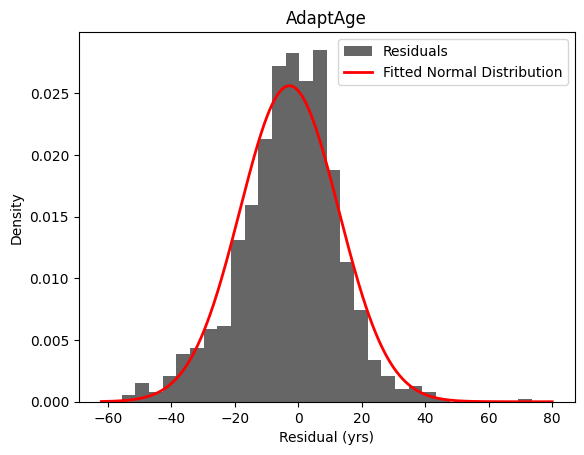

In [22]:
# Create a histogram of residuals
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='k', label='Residuals')

# Create PDFs (probability density functions) of the fitted distributions
xmin, xmax = plt.xlim()
adapt_x = np.linspace(xmin, xmax, 1000)
adapt_resids = stats.norm.pdf(adapt_x, mu, std)

adapt_fit = pd.DataFrame({'Error': adapt_x, 'Density': adapt_resids, 'Model': 'AdaptAge'})

# Plot the fitted distributions
plt.plot(adapt_x, adapt_resids, 'r-', linewidth=2, label='Fitted Normal Distribution')

plt.xlabel('Residual (yrs)')
plt.ylabel('Density')
plt.legend()
plt.title('AdaptAge');